In [33]:
#Import Libraries
import pandas as pd
import numpy as np

## 1. Read the file, incorporate the instances into the training set and testing set. 

In [34]:
#Read file and create dataframe
df = pd.read_csv('imdbDataset.csv')
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,review,sentiment
0,0,Quite a production from the director telling t...,positive
1,1,"An unbelievable plot, laughable characters, an...",negative
2,2,This movie was horrible. I swear they didn't e...,negative
3,3,Simply miserable Lana Turner-Ezio Pinza vehicl...,negative
4,4,"If there's one good suspenseful film, this is ...",positive
...,...,...,...
18995,18995,I had such high hopes for this film because I ...,negative
18996,18996,Clint Tollinger arrives in a small town lookin...,positive
18997,18997,"This is by far the worst ever 'horror' movie, ...",negative
18998,18998,Let me start off by saying that this doesn't s...,negative


## 2. Pre-processing

In [35]:
#Import Libraries
import re
import nltk
from nltk.corpus import stopwords

#Create function that will remove HTML tags, non_alphanumeric characters and symbols using regex and remove stopwords with nltk
def clean_text(text):
    # Remove HTML tags
    ct = re.sub('<.*?>', '', text)
    
    # Remove non-alphanumeric characters and symbols
    ct = re.sub(r'[^a-zA-Z\s]', '', ct)
    
    # Convert to lowercase
    ct = ct.lower()
    
    #Import stop words from the english language
    stop_words = set(stopwords.words('english'))
    #Tokenize current review text
    words = nltk.word_tokenize(ct)
    #Keep word if it's not in stop words that were imported.
    filtered_words = [word for word in words if word.lower() not in stop_words]
    #Return cleaned string
    return ' '.join(filtered_words)

#Apply function to the each row of the df to clean the data
for i in range(len(df['review'])):
    df['review'][i] = clean_text(df['review'][i])

C:\Users\patog\AppData\Local\Temp\ipykernel_17472\1176480152.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = clean_text(df['review'][i])


## Separate data into training and testing

In [36]:
#Separate the data into 2 dataframes, Training(80%) and Testing(20%)
train = df.head(15200)
test = df.tail(3800)

#Do a sample of the data so the rows are randomized in order to avoid pattern learning.
train = train.sample(frac=1)
#Reset index of dataframe so it begins with 0 and goes in that order. We repeat for the rest of dataframes.
train = train.reset_index(drop=True)
#Repeat for test and validation dataframes.
test = test.sample(frac=1)
test = test.reset_index(drop=True)

## 3. Analysing feature of training set

In [37]:
#Create a new column that will contain quantity of words per review.
train['Quantity'] = 0
for i in range(len(train)):
    train['Quantity'][i] = np.char.count(train['review'][i], ' ') + 1

C:\Users\patog\AppData\Local\Temp\ipykernel_17472\2012305262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Quantity'][i] = np.char.count(train['review'][i], ' ') + 1


### Review Length

In [38]:
train1 = train.describe()
train1 = train1.drop('count')
train1

,Unnamed: 0,Quantity
mean,7599.500000,118.329211
std,4388.006381,89.308038
min,0.000000,3.000000
25%,3799.750000,64.000000
50%,7599.500000,88.000000
75%,11399.250000,143.000000
max,15199.000000,912.000000


### Most Common Words

In [39]:
from collections import Counter
from nltk.tokenize import word_tokenize

#Join all reviews into a single string
allRev = ' '.join(train['review'])

#Tokenize the string into individual words
words = word_tokenize(allRev)

#Count the frequency of each word
wordCount = Counter(words)

#Sort the words based on their frequency
sortedWords = sorted(wordCount.items(), key=lambda x: x[1], reverse=True)

#Display the most common 10 words in all the dataset
for word, count in sortedWords[:10]:
    print(f'{word}: {count}')

movie: 25721
film: 22479
one: 15519
like: 11824
good: 8595
even: 7334
would: 7265
time: 7115
really: 6948
see: 6721


### Common Phrases using Bigrams

In [40]:
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd

#First we create another column which will contain the review text but tokenized
train['tokens'] = train['review'].apply(word_tokenize)

#Function to generate n-grams for a given review
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

#Apply the function to all reviews
#Create another column that contains will contain all bigrams created by the function we created above.
train['bigrams'] = train['tokens'].apply(lambda x: generate_ngrams(x, 2))

#Flatten the list of bigrams
#Create an empty list to store all bigrams
all_bigrams = []

#Iterate over each list of bigrams in the 'bigrams' column
for sublist in train['bigrams']:
    #Iterate over each bigram in the current sublist
    for bigram in sublist:
        #Append the bigram to the list
        all_bigrams.append(bigram)

#Calculate the frequency distribution of bigrams
bigram_freq_dist = FreqDist(all_bigrams)

#Print the most common bigrams
print("Top 10 Bigrams:")
for bigram, frequency in bigram_freq_dist.most_common(10):
    print(f'{bigram}: {frequency}')


Top 10 Bigrams:
('ever', 'seen'): 778
('ive', 'seen'): 651
('special', 'effects'): 639
('even', 'though'): 589
('dont', 'know'): 582
('one', 'best'): 539
('looks', 'like'): 509
('waste', 'time'): 443
('much', 'better'): 440
('see', 'movie'): 439


### Sentiment Distribution

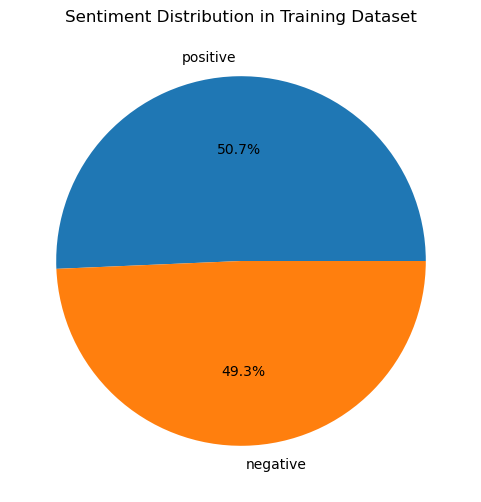

Sentiment Label Distribution:
positive    7703
negative    7497
Name: sentiment, dtype: int64


In [41]:
import matplotlib.pyplot as plt

#Check the distribution of sentiment labels
sent_dist = train['sentiment'].value_counts()

#Plot the distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sent_dist, labels=sent_dist.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution in Training Dataset')
plt.show()

# Display the count of each sentiment label
print("Sentiment Label Distribution:")
print(sent_dist)

## 4. Text Classification Model

In [42]:
#Import libraries for classification model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Feature extraction
vectorizer = TfidfVectorizer(max_features=10000)
#Fit reviews column to train and test data for the model using sklearn library.
X_train = vectorizer.fit_transform(train['review'])
X_test = vectorizer.transform(test['review'])

#Model training with Logistic Regression
model = LogisticRegression()
#Give the model the training data and it's respective sentiment so it can learn
model.fit(X_train, train['sentiment'])

#Model evaluation
#predict values of the X_test variable created earlier
y_pred = model.predict(X_test)
#Compute accuracy to see how well our model is performing, it compares predictions vs actual values.
accuracy = accuracy_score(test['sentiment'], y_pred)
#Print Results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(test['sentiment'], y_pred))

Accuracy: 0.8821052631578947
Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      1910
    positive       0.87      0.89      0.88      1890

    accuracy                           0.88      3800
   macro avg       0.88      0.88      0.88      3800
weighted avg       0.88      0.88      0.88      3800



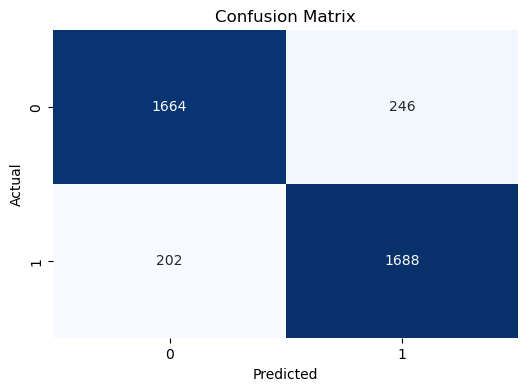

In [43]:
#import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Plot confusion matrix
cm = confusion_matrix(test['sentiment'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#0 is Negative and 1 is Positive reviews
plt.show()
